In [1]:
import numpy as np

def generate_AR1(phi, sigma, n_samples): #phi is coeff, sigma is noise

    ts = [np.random.normal()]#start with random value

    for i in range(n_samples-1):
        noise = np.random.normal(scale=sigma)
        value = phi * ts[i] + noise
        ts.append(value)

    return ts

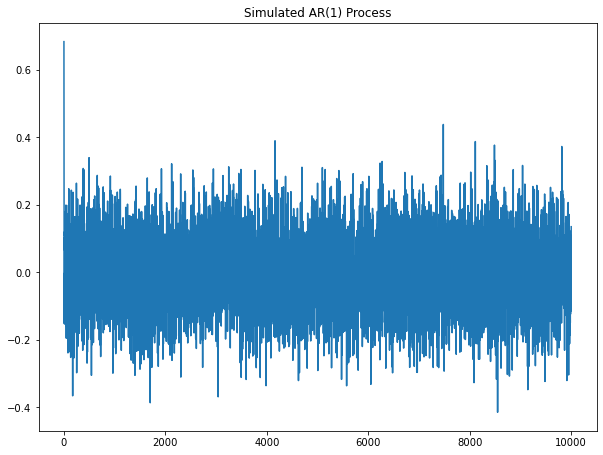

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

ts = generate_AR1(phi=0.33, sigma=0.1, n_samples=10000)
plt.figure(figsize=[10, 7.5]); 
plt.plot(ts)
plt.title("Simulated AR(1) Process")
plt.show()

In [3]:
ts
pd.DataFrame(ts).to_csv('AR1_data.csv') 

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


C:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


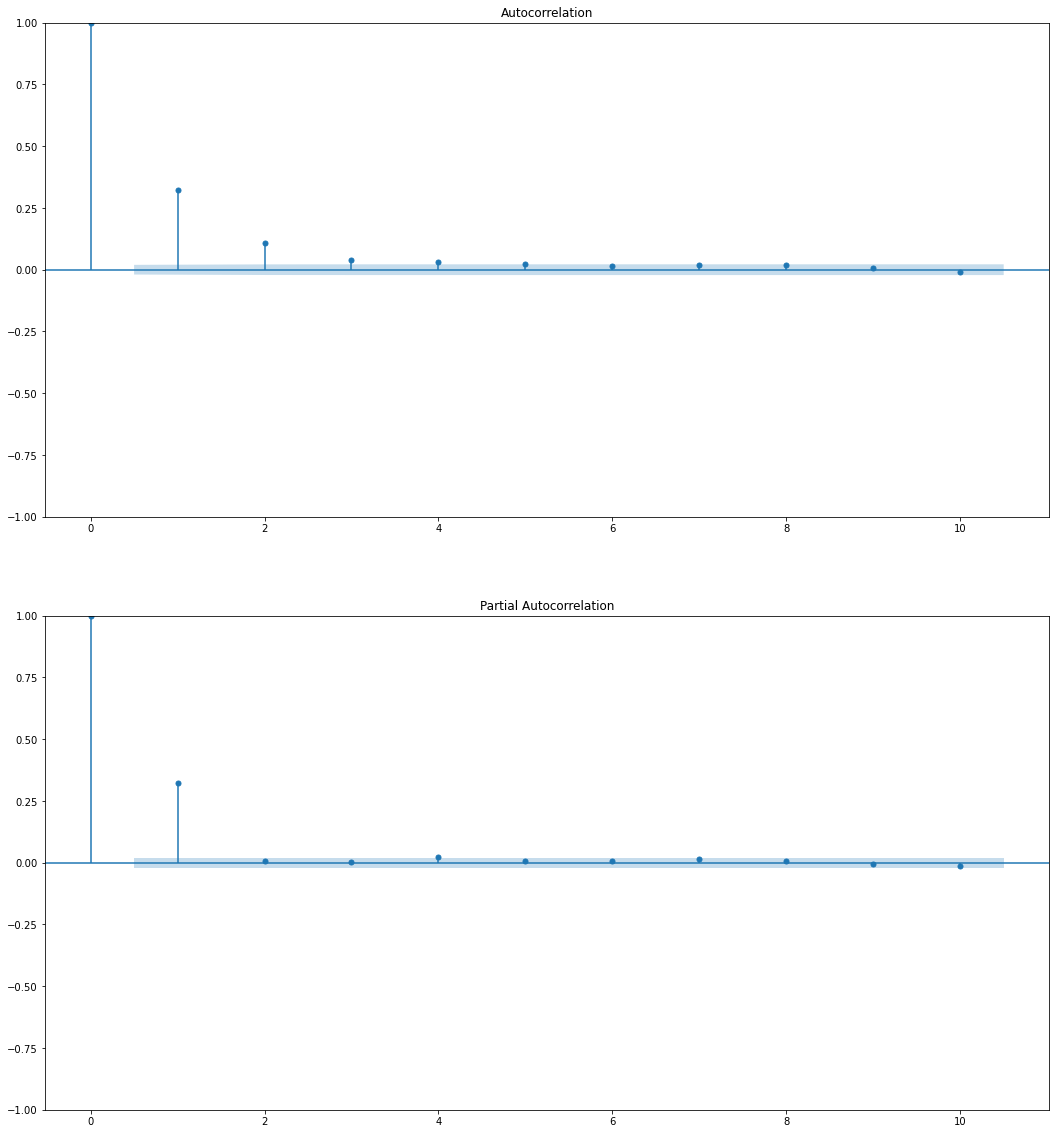

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(18, 20), sharey=True)

plot_acf(ax=axes[0], x=ts, lags=10)

plot_pacf(ax=axes[1], x=ts, lags=10)

plt.show()

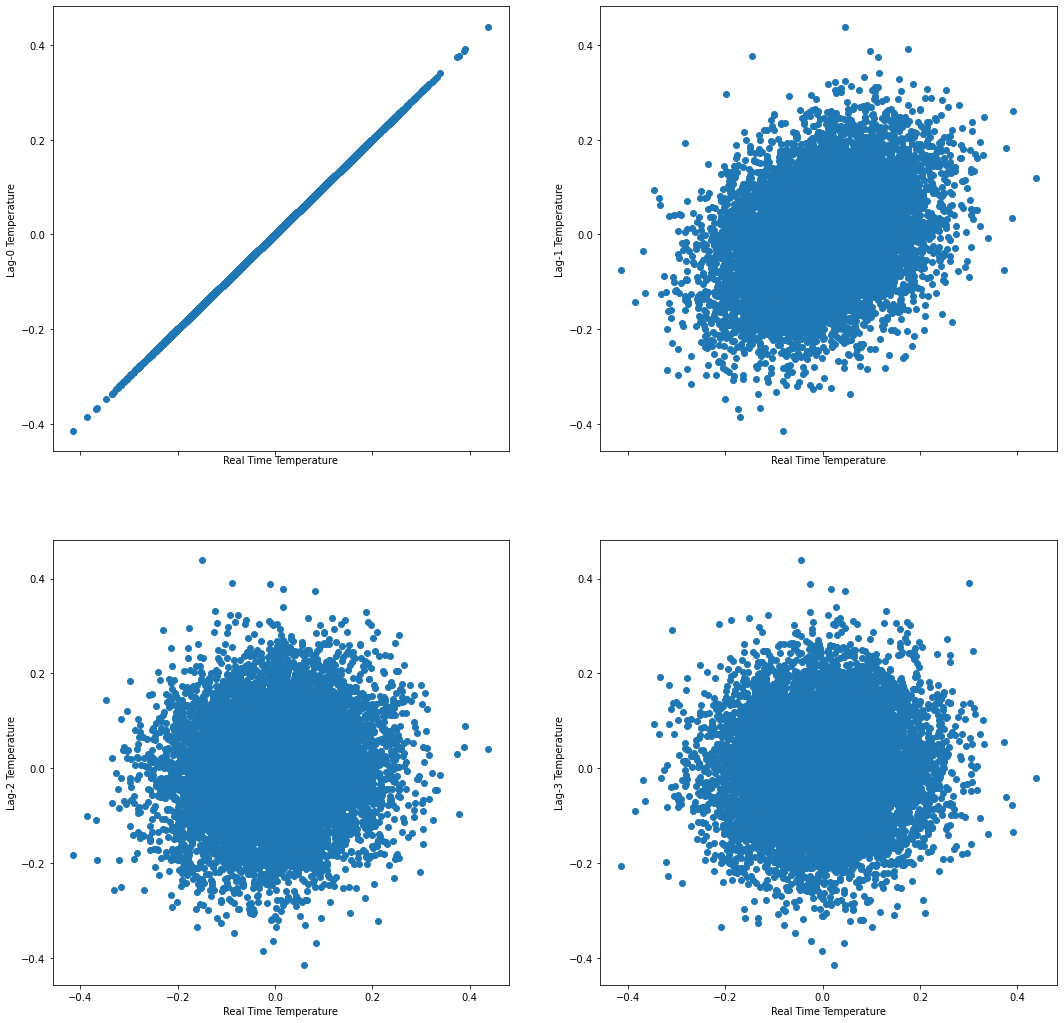

In [6]:
n = 4
current = ts[n:]
fig, axis = plt.subplots(2, n//2, sharex=True, figsize=(18, 18))

for i in range(n):
  if i != 0:
    lag = ts[(n-i):-i]
  else:
    lag = current
  axis[(i)//2, (i)%2].set(xlabel='Real Time Temperature', ylabel=f'Lag-{i} Temperature')
  axis[(i)//2, (i)%2].scatter(current, lag)

plt.show()